In [245]:
# Importing Libraries

import pandas as pd
import numpy as np

In [246]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [247]:
train.shape, test.shape

((82657, 12), (20665, 11))

In [248]:
train.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [249]:
test.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole


## Data Analysis

Before we go into more complicated work, first we have to explore our dataset.

Now, we want to explore our features in more statistic way. We will use describe method from pandas. It will return us information about:

- mean
- standard deviation
- minimum value
- maximum value
- 25%,50%,75% quantille

In [250]:
train.describe()

,points,price
count,82657.000000,77088.000000
mean,88.544564,36.922232
std,3.099649,43.698346
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


As we can see only price is continous variable in our input. As we can see on minimum and maximium value there is really high diverse in price feature. There is wine which cost 3300 dollars , but we can see that 75 percent of wines are cheaper than 45 dollars.

**Duplicates**

First of all let's explore our data. On first look into data we can see that there are many duplicates, which we have to drop.

Let's see how many duplicates are in the data.

In [251]:
print("Total number of examples: ", train.shape[0])
print("Number of examples with the same title and description: ", train[train.duplicated(['review_description','review_title'])].shape[0])

Total number of examples:  82657
Number of examples with the same title and description:  5016


In [252]:
train=train.drop_duplicates(['review_description','review_title'])
train=train.reset_index(drop=True)

In [253]:
print("Total number of examples: ", test.shape[0])
print("Number of examples with the same title and description: ", test[test.duplicated(['review_description','review_title'])].shape[0])

Total number of examples:  20665
Number of examples with the same title and description:  314


In [254]:
test=test.drop_duplicates(['review_description','review_title'])
test=test.reset_index(drop=True)

**NULL/Missing values**

Now, we will investigate our dataset in order to see how many missing values there is.

In [255]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77641 entries, 0 to 77640
Data columns (total 12 columns):
user_name             59105 non-null object
country               77608 non-null object
review_title          77641 non-null object
review_description    77641 non-null object
designation           55458 non-null object
points                77641 non-null int64
price                 72356 non-null float64
province              77608 non-null object
region_1              65680 non-null object
region_2              33814 non-null object
winery                77641 non-null object
variety               77641 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 7.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20351 entries, 0 to 20350
Data columns (total 11 columns):
user_name             15670 non-null object
country               20348 non-null object
review_title          20351 non-null object
review_description    20351 non-null object
designation    

(None, None)

In [256]:
train.isnull().sum().sort_values(ascending=False).nlargest(20)

region_2              43827
designation           22183
user_name             18536
region_1              11961
price                  5285
province                 33
country                  33
variety                   0
winery                    0
points                    0
review_description        0
review_title              0
dtype: int64

In [257]:
test.isnull().sum().sort_values(ascending=False).nlargest(20)

region_2              11566
designation            5901
user_name              4681
region_1               3255
price                  1374
province                  3
country                   3
winery                    0
points                    0
review_description        0
review_title              0
dtype: int64

The most missing values are in region, designation, user name and price columns.

In [258]:
train.variety.value_counts().sort_values()

Gamay                          759
Gewürztraminer                 792
Bordeaux-style White Blend     806
Pinot Grigio                   820
Portuguese White               835
Grüner Veltliner               976
Cabernet Franc                1028
Pinot Gris                    1064
Champagne Blend               1075
Rhône-style Red Blend         1102
Tempranillo                   1365
Sparkling Blend               1621
White Blend                   1779
Portuguese Red                1843
Malbec                        1985
Sangiovese                    2006
Zinfandel                     2091
Nebbiolo                      2112
Merlot                        2337
Rosé                          2607
Syrah                         3117
Sauvignon Blanc               3752
Riesling                      3877
Bordeaux-style Red Blend      5206
Red Blend                     6729
Cabernet Sauvignon            7155
Chardonnay                    8836
Pinot Noir                    9966
Name: variety, dtype

## Data visualization

Remeber that in this stage our goal is not only to explore our data in order to get better predictions. We also want to get better understanding what is in data and explore data in 'normal' way. This kind of approch can be useful if we have to do some feature engineering, where good data understanding can really help to produce better features.

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns


### Point Distribution

In [260]:
def pastel_plot(data, x, y):
    plt.figure(figsize = (15,6))
    plt.title('Points histogram - whole dataset')
    sns.set_color_codes("pastel")
    sns.barplot(x = x, y=y, data=df)
    locs, labels = plt.xticks()
    plt.show()

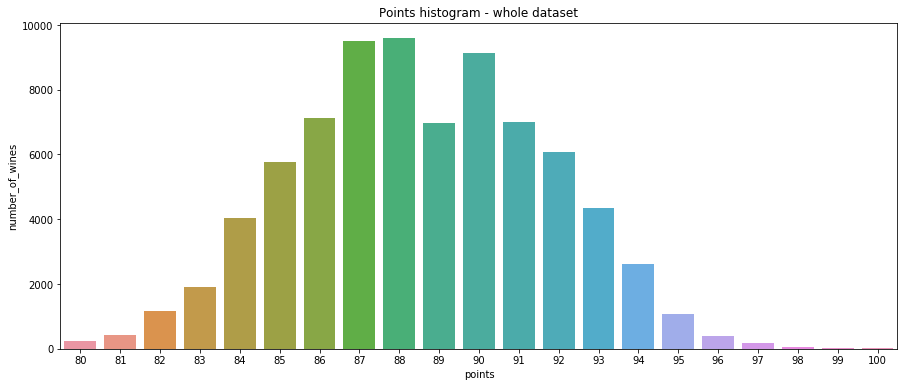

In [261]:
temp = train["points"].value_counts()
df = pd.DataFrame({'points': temp.index,
                   'number_of_wines': temp.values
                  })

pastel_plot(df,'points', 'number_of_wines')

We can see that all wines have number of points above 80. And points has normal distribution. The most wines have 88 points.


### Country Features

Let's investigate which country have most expensive and most high rated wines. First of all we will sort it by price and then plot.

In [262]:
z=train.groupby(['country'])['price','points'].mean().reset_index().sort_values('price',ascending=False)
z[['country','price']].head(n=10)

,country,price
33,Switzerland,94.750000
10,England,51.538462
18,Italy,46.738333
13,Germany,44.724688
11,France,44.122072
35,US,37.568786
29,Serbia,34.666667
5,Canada,33.470199
17,Israel,32.914676
2,Austria,31.970490


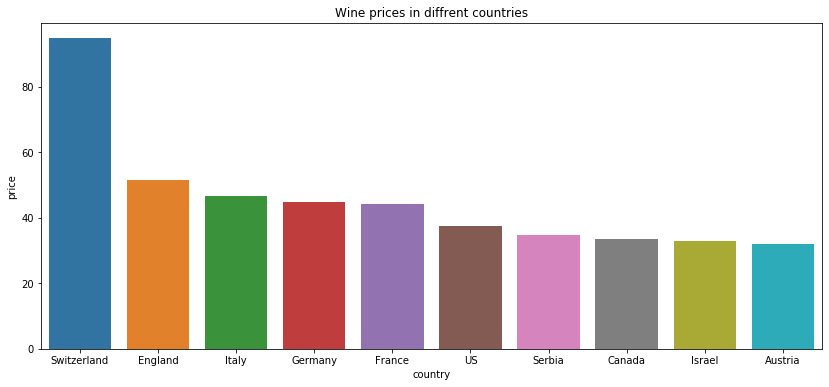

In [263]:
plt.figure(figsize = (14,6))
plt.title('Wine prices in diffrent countries')
sns.barplot(x = 'country', y="price", data=z.head(10))
locs, labels = plt.xticks()
plt.show()

In [264]:
z=z.sort_values('points', ascending=False)
z[['country','points']].head(10)

,country,points
10,England,91.545455
2,Austria,90.367232
13,Germany,90.046385
5,Canada,89.326797
16,India,89.000000
18,Italy,88.988998
11,France,88.903461
24,Morocco,88.842105
35,US,88.609694
20,Luxembourg,88.500000


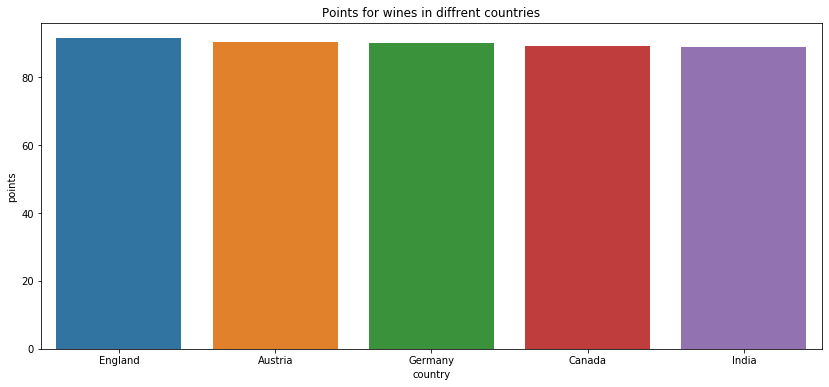

In [265]:
plt.figure(figsize = (14,6))
plt.title('Points for wines in diffrent countries')
sns.set_color_codes("pastel")
sns.barplot(x = 'country', y="points", data=z.head(5))
locs, labels = plt.xticks()
plt.show()

We can easily note, that the wines in Switzerland are the most expensive one. I think the most impactful factor is much higher prices for all goods in this country. The highest mean of points came to England Based on our data let's try make some guesses why England wines are the best.

- Most suppliers come from England
- England provide information only for thier best wines
- They are simply the best :)

We can partly check our second guess. Let's see how many wines are in dataset from particular country.

In [266]:
country=train['country'].value_counts()

country.head(20)

US              36269
France          14968
Italy            8544
Portugal         2998
Chile            2740
Spain            2583
Argentina        2433
Austria          1770
Germany          1466
New Zealand      1033
Australia         976
South Africa      678
Israel            303
Canada            153
Greece            135
Bulgaria           91
Romania            69
England            55
Mexico             38
Slovenia           38
Name: country, dtype: int64

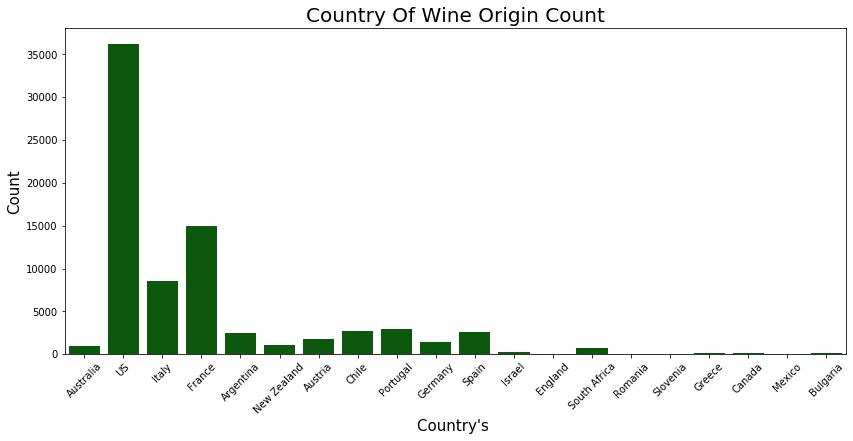

In [267]:
plt.figure(figsize=(14,6))

country = train.country.value_counts()[:20]

g = sns.countplot(x='country', 
                  data=train[train.country.isin(country.index.values)],
                 color='darkgreen')
g.set_title("Country Of Wine Origin Count", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

### Variety Distribution

In [268]:
train['variety'].unique()

array(['Chardonnay', 'Red Blend', 'Nebbiolo',
       'Bordeaux-style White Blend', 'Malbec', 'Cabernet Sauvignon',
       'Zinfandel', 'Pinot Noir', 'Sauvignon Blanc', 'Gamay',
       'Grüner Veltliner', 'Bordeaux-style Red Blend', 'Sangiovese',
       'Syrah', 'White Blend', 'Cabernet Franc', 'Portuguese Red',
       'Portuguese White', 'Rhône-style Red Blend', 'Rosé',
       'Champagne Blend', 'Merlot', 'Riesling', 'Sparkling Blend',
       'Pinot Grigio', 'Tempranillo', 'Pinot Gris', 'Gewürztraminer'],
      dtype=object)

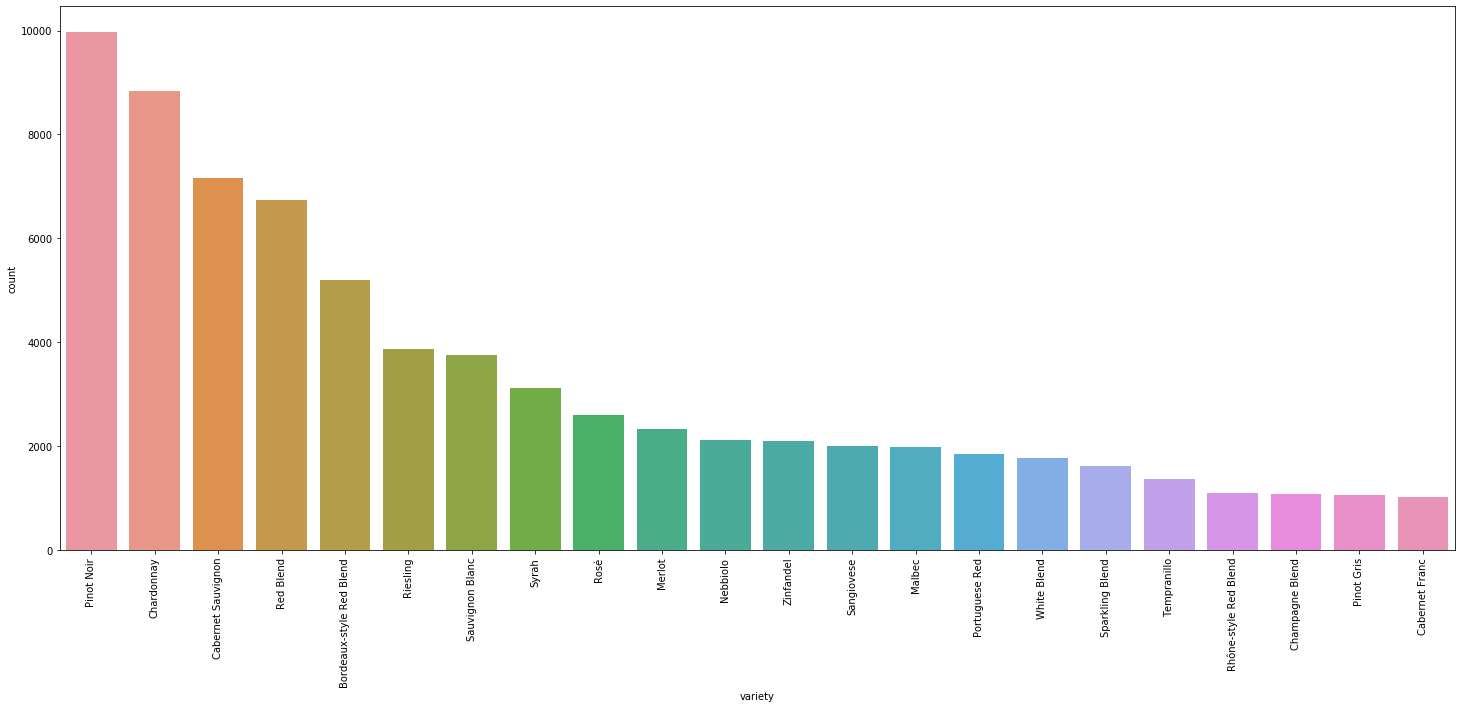

In [269]:
variety_df = train.groupby('variety').filter(lambda x: len(x) > 1000)
varieties = variety_df['variety'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = variety_df['variety'], order = varieties, ax = ax)
plt.xticks(rotation = 90)
plt.show()


## Story Generation and visualization from reviews

### WORDCLOUD OF WINE TITLES

In [272]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

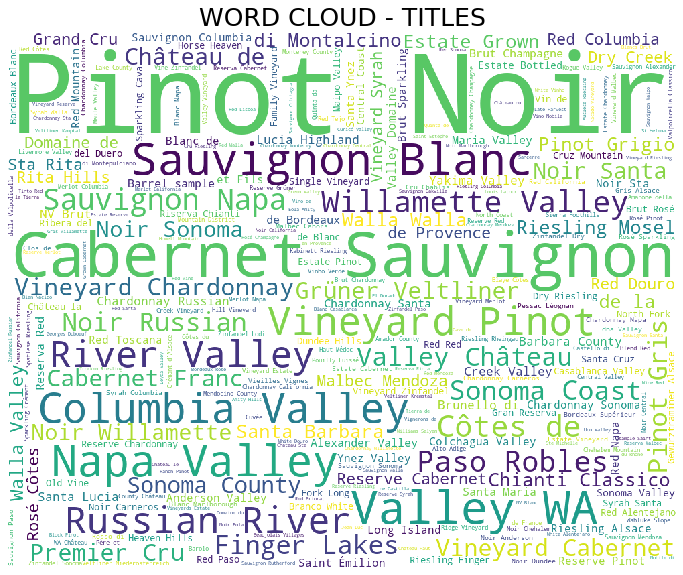

In [273]:
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,).generate(" ".join(train['review_title'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES",fontsize=25)
plt.axis('off')
plt.show()

### WORDCLOUDS OF DESCRIPTIONS

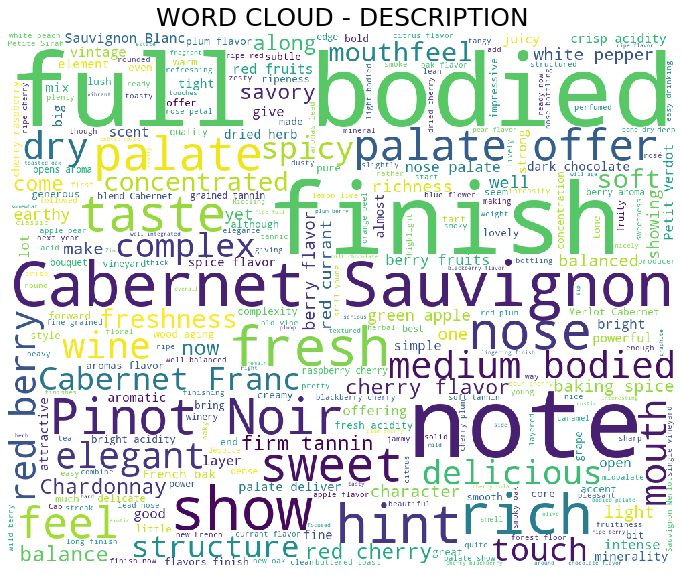

In [274]:
newStopWords = ['fruit', "Drink", "black", 'wine', 'drink']

stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(train['review_description'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

# Preparing Data

In [275]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
from wordcloud import WordCloud, STOPWORDS
import re

from nltk.tokenize import RegexpTokenizer

In [276]:
import nltk
nltk.download("stopwords")

from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def remove_stopwords(string):
    word_list = [word.lower() for word in string.split()]
    stopwords_list = list(stopwords.words("english"))
    for word in word_list:
        if word in stopwords_list:
            word_list.remove(word)
    return ' '.join(word_list)


[nltk_data] Downloading package stopwords to C:\Users\SHIVAM
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [277]:
train['review_title'] = train['review_title'].astype(str)
test['review_title'] = test['review_title'].astype(str)
train['review_title'] = train['review_title'].str.lower()
test['review_title'] = test['review_title'].str.lower()

train['review_description'] = train['review_description'].astype(str)
test['review_description'] = test['review_description'].astype(str)
train['review_description'] = train['review_description'].str.lower()
test['review_description'] = test['review_description'].str.lower()

In [278]:
train.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,andrew peace 2007 peace family vineyard chardo...,"classic chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,north by northwest 2014 red (columbia valley (...,this wine is near equal parts syrah and merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,renato ratti 2007 conca (barolo),barolo conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,domaine l'ancienne cure 2010 l'abbaye white (b...,it's impressive what a small addition of sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,château du cèdre 2012 le cèdre vintage malbec ...,"this ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [279]:
train['review_description']= train['review_description'].apply(lambda elem: re.sub('[^a-zA-Z]',' ', elem))  
train['review_description']

0        classic chardonnay aromas of apple  pear and h...
1        this wine is near equal parts syrah and merlot...
2        barolo conca opens with inky dark concentratio...
3        it s impressive what a small addition of sauvi...
4        this ripe  sweet wine is rich and full of drie...
                               ...                        
77636    made in a drier  tarter style than the winery ...
77637    hot earth  baked cherry and mild vanilla aroma...
77638    pungent  high pitched notes of turmeric and dr...
77639    this is a wine that s not just lively and frui...
77640    a big  rich  vital cabernet with immediate att...
Name: review_description, Length: 77641, dtype: object

In [280]:
test['review_description']= test['review_description'].apply(lambda elem: re.sub('[^a-zA-Z]',' ', elem))  
test['review_description']

0        nicely differentiated from the companion stewa...
1        charred  smoky  herbal aromas of blackberry tr...
2        slightly sour and funky in earth  this is a re...
3        this concentrated  midnight black malbec deliv...
4        earthy aromas suggesting grilled porcini  leat...
                               ...                        
20346    clearly focused and fruit driven  this wine ha...
20347    herbal tones of bay and rosemary are upfront o...
20348    mocha cream  pencil shaving and dried herb aro...
20349    loud citrus and berry aromas precede an overlo...
20350    with very ripe fruit and firm tannins  this mo...
Name: review_description, Length: 20351, dtype: object

In [281]:
train['review_description'] = train['review_description'].map(lambda x: re.sub('\\n',' ',str(x)))
train['review_description'] = train['review_description'].map(lambda x: re.sub(r'\W',' ',str(x)))
train['review_description'] = train['review_description'].map(lambda x: re.sub(r'\s+[a-zA-Z]\s+',' ',str(x)))
train['review_description'] = train['review_description'].map(lambda x: re.sub(r'\^[a-zA-Z]\s+',' ',str(x)))
train['review_description'] = train['review_description'].map(lambda x: re.sub(r'\s+',' ',str(x)))
train['review_description'] = train['review_description'].apply(lambda x: remove_stopwords(x))
train.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,andrew peace 2007 peace family vineyard chardo...,classic chardonnay aromas apple pear hay lead ...,Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,north by northwest 2014 red (columbia valley (...,wine near equal parts syrah merlot the balance...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,renato ratti 2007 conca (barolo),barolo conca opens inky dark concentration soo...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,domaine l'ancienne cure 2010 l'abbaye white (b...,impressive small addition sauvignon gris musca...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,château du cèdre 2012 le cèdre vintage malbec ...,ripe sweet wine rich full dried fresh fruit fl...,Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [282]:
test['review_description'] = test['review_description'].map(lambda x: re.sub('\\n',' ',str(x)))
test['review_description'] = test['review_description'].map(lambda x: re.sub(r'\W',' ',str(x)))
test['review_description'] = test['review_description'].map(lambda x: re.sub(r'\s+[a-zA-Z]\s+',' ',str(x)))
test['review_description'] = test['review_description'].map(lambda x: re.sub(r'\^[a-zA-Z]\s+',' ',str(x)))
test['review_description'] = test['review_description'].map(lambda x: re.sub(r'\s+',' ',str(x)))
test['review_description'] = test['review_description'].apply(lambda x: remove_stopwords(x))

In [283]:
test.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,boedecker cellars 2011 athena pinot noir (will...,nicely differentiated the companion stewart bo...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,mendoza vineyards 2012 gran reserva by richard...,charred smoky herbal aromas blackberry trend d...,Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,prime 2013 chardonnay (coombsville),slightly sour funky earth is restrained white ...,NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,bodega cuarto dominio 2012 chento vineyard sel...,concentrated midnight black malbec delivers ar...,Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,sassodisole 2012 brunello di montalcino,earthy aromas suggesting grilled porcini leath...,NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole


In [284]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
train['variety'] = labelEncoder.fit_transform(train['variety'])

In [285]:
train.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,andrew peace 2007 peace family vineyard chardo...,classic chardonnay aromas apple pear hay lead ...,Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,5
1,@wawinereport,US,north by northwest 2014 red (columbia valley (...,wine near equal parts syrah merlot the balance...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,17
2,NaN,Italy,renato ratti 2007 conca (barolo),barolo conca opens inky dark concentration soo...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,11
3,@vossroger,France,domaine l'ancienne cure 2010 l'abbaye white (b...,impressive small addition sauvignon gris musca...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,1
4,@vossroger,France,château du cèdre 2012 le cèdre vintage malbec ...,ripe sweet wine rich full dried fresh fruit fl...,Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,9


In [303]:
train = train.drop(['region_2', 'region_1', 'designation'], axis = 1)

In [304]:
train.head()

,user_name,country,review_title,review_description,points,price,province,winery,variety
0,NaN,Australia,andrew peace 2007 peace family vineyard chardo...,classic chardonnay aromas apple pear hay lead ...,83,10.0,Australia Other,Andrew Peace,5
1,@wawinereport,US,north by northwest 2014 red (columbia valley (...,wine near equal parts syrah merlot the balance...,89,15.0,Washington,North by Northwest,17
2,NaN,Italy,renato ratti 2007 conca (barolo),barolo conca opens inky dark concentration soo...,94,80.0,Piedmont,Renato Ratti,11
3,@vossroger,France,domaine l'ancienne cure 2010 l'abbaye white (b...,impressive small addition sauvignon gris musca...,87,22.0,Southwest France,Domaine l'Ancienne Cure,1
4,@vossroger,France,château du cèdre 2012 le cèdre vintage malbec ...,ripe sweet wine rich full dried fresh fruit fl...,88,33.0,France Other,Château du Cèdre,9


# Modelling

In [305]:
target = train["variety"]
train2 = train.drop(['variety'], axis=1)

x_train, x_val, y_train, y_val = train_test_split(train2, target, test_size=0.3, random_state=2019)

In [306]:
train2.head()

,user_name,country,review_title,review_description,points,price,province,winery
0,NaN,Australia,andrew peace 2007 peace family vineyard chardo...,classic chardonnay aromas apple pear hay lead ...,83,10.0,Australia Other,Andrew Peace
1,@wawinereport,US,north by northwest 2014 red (columbia valley (...,wine near equal parts syrah merlot the balance...,89,15.0,Washington,North by Northwest
2,NaN,Italy,renato ratti 2007 conca (barolo),barolo conca opens inky dark concentration soo...,94,80.0,Piedmont,Renato Ratti
3,@vossroger,France,domaine l'ancienne cure 2010 l'abbaye white (b...,impressive small addition sauvignon gris musca...,87,22.0,Southwest France,Domaine l'Ancienne Cure
4,@vossroger,France,château du cèdre 2012 le cèdre vintage malbec ...,ripe sweet wine rich full dried fresh fruit fl...,88,33.0,France Other,Château du Cèdre


In [307]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer, TfidfTransformer

In [308]:
vec = CountVectorizer()

In [309]:
X_train_counts = vec.fit_transform(train['review_description'])

# TF-IDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [310]:
X_train_tfidf.shape

(77641, 25329)

In [311]:
X_val_counts = vec.transform(x_val['review_description'])
X_val_tfidf = tfidf_transformer.transform(X_val_counts)

In [312]:
X_val_tfidf.shape

(23293, 25329)

In [313]:
test_counts = vec.transform(test['review_description'])
test_tfidf = tfidf_transformer.transform(test_counts)
print(test_tfidf.shape)

(20351, 25329)


# Machine Learning Algorithm

## 1. Logistic Regression

In [314]:
lnreg = LogisticRegression()

lnreg.fit(X_train_tfidf, target)

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [315]:
y_pred_ln = lnreg.predict(X_val_tfidf)
y_pred_ln

array([17,  7, 14, ...,  5, 27,  3])

In [316]:
score = np.sqrt(mean_squared_error(y_val, y_pred_ln))
print('RMSE score: %.2f' % score)
print('Variance score: %.2f' % r2_score(y_val, y_pred_ln))

RMSE score: 6.02
Variance score: 0.43


In [317]:
y_pred_ln = lnreg.predict(test_tfidf)
y_pred_ln

array([14,  9,  5, ...,  3,  9,  3])

In [319]:
submission = pd.DataFrame(data = {"user_name":test.user_name, "review_description":y_pred_ln})
submission.to_csv("submission.csv", index=False)
print(submission['review_description'].value_counts())

14    3434
5     3153
3     2431
17    1727
0     1578
19    1052
22     934
20     744
24     644
11     564
15     453
27     386
21     371
9      363
23     339
26     291
10     279
25     247
8      243
18     194
4      155
13     143
16     132
7      126
6      112
12      96
1       88
2       72
Name: review_description, dtype: int64


## Random Forest

In [299]:
rf = RandomForestClassifier(n_estimators=200, random_state = 2020, verbose=1).fit(X_train_tfidf, target)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 11.7min finished


In [300]:
y_pred_rf = rf.predict(X_val_tfidf)
y_pred_rf


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   23.5s finished


array([17,  7,  3, ..., 13, 27,  3])

In [301]:
score=rf.score(X_train_tfidf, target)
#score=rf.score(X_train_tfidf, y_train)
score

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   16.6s finished


0.9999484808284282

In [302]:
y_pred_rf = rf.predict(test_tfidf)
y_pred_rf

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.5s finished


array([14,  9,  5, ..., 14,  9,  3])

In [320]:
submission = pd.DataFrame(data = {"user_name":test.user_name, "review_description":y_pred_rf})
submission.to_csv("submission.csv", index=False)
print(submission['review_description'].value_counts())

5     3866
14    3684
3     2660
17    1848
0     1841
19     987
22     773
20     699
11     561
24     479
9      290
27     274
15     256
23     245
10     241
21     237
26     228
18     187
8      174
25     148
13     125
16     102
7       92
4       90
12      86
6       67
1       60
2       51
Name: review_description, dtype: int64
